#  Assignment 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.

##    (a) What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.
> This is 1 - probability that it is the $j$th = $1 - 1/n$.
##    (b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?
> Each bootstrap observation is a random sample, this probability is the same ($1 - 1/n$).
##    (c) Argue that the probability that the jth observation is not in the bootstrap sample is (1 − 1/n)n.
>For the $j$th observation to not be in the sample, it would have to _not_ be picked for each of $n$ positions, so not picked for $1, 2, ..., n$, thus the probability is $(1 - 1/n)^n$ 
##    (d) When n = 5, what is the probability that the jth observation is in the bootstrap sample?




In [2]:
n = 5
p =1 - (1 - 1 / n)**n 
print(p)

0.6723199999999999


##    (g) Create a plot that displays, for each integer value of $n$ from 1 to 100,000, the probability that the $j$th observation is in the bootstrap sample. Comment on what you observe.

Text(0, 0.5, 'probability')

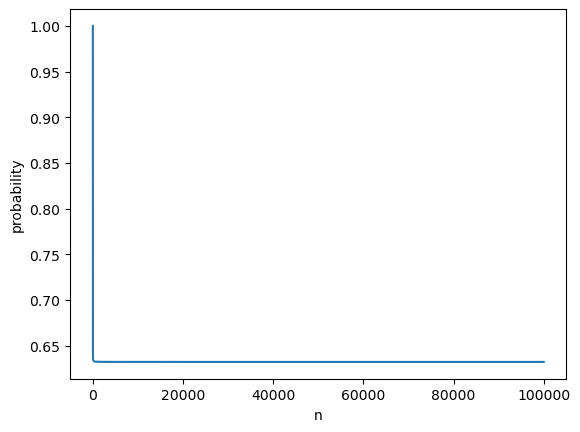

In [4]:
def prob_j_in_sample(n):
    return 1 - (1 - 1/n)**n

x = np.arange(1, 100000)
y = np.array([prob_j_in_sample(n) for n in x])

ax = sns.lineplot(x=x, y=prob_j_in_sample(x))
plt.xlabel('n')
plt.ylabel('probability')

# 9. We will now consider the Boston housing data set, from the MASS library.

In [6]:
import numpy as np
import pandas as pd
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
raw_df = pd.read_csv(data_url)
raw_df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# (a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate μˆ.

In [7]:
mu_hat = raw_df['medv'].mean()
display(mu_hat)

22.532806324110677

# (b) Provide an estimate of the standard error of μˆ. Interpret this result.
Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.


In [11]:
from scipy.stats import sem
sigma=raw_df['medv'].sem()
display(sigma)

0.40886114749753505

# (c) Now estimate the standard error of μˆ using the bootstrap. How does this compare to your answer from (b)?

In [12]:
import numpy as np

def bootstrap_standard_error(data, num_samples):
    # Number of data points
    n = len(data)
    
    # Generate bootstrap samples
    bootstrap_samples = [np.random.choice(data, size=n, replace=True) for _ in range(num_samples)]
    
    # Calculate sample means for each bootstrap sample
    sample_means = np.mean(bootstrap_samples, axis=1)
    
    # Compute the standard deviation of the sample means
    std_sample_means = np.std(sample_means)
    
    # Calculate standard error of the sample mean
    standard_error = std_sample_means / np.sqrt(num_samples)
    
    return standard_error

# Example data (replace this with your actual data)
data = raw_df['medv']
# Number of bootstrap samples
num_samples = 1000

# Calculate standard error using bootstrap
se_bootstrap = bootstrap_standard_error(data, num_samples)

print("Standard Error of the Sample Mean (Bootstrap):", se_bootstrap)


Standard Error of the Sample Mean (Bootstrap): 0.012437060726617356


> The bootstrap method gives a good estimate of the standard error, when compared to the same estimate derived analytically. The bootstrap approach is computationally more expensive, but has the advantage that no analytic derivation of the standard error for the statistic is required, making it much more general for application to other statistics.

# (d) Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of medv. Compare it to the results obtained using
t.test(Boston$medv) 
Hint: You can approximate a 95% confidence interval using the formula [μˆ − 2SE(μˆ), μˆ + 2SE(μˆ)].

In [15]:
upper = mu_hat+2*sigma
lower =mu_hat-2*sigma

pd.Series({'mu': mu_hat, 
           'SE': sigma,
           '[0.025': lower,
           '0.975]': upper})

mu        22.532806
SE         0.408861
[0.025    21.715084
0.975]    23.350529
dtype: float64

# (e) Based on this dataset, provide an estimate, μˆmed, for the median value of medv in the population.

In [16]:
median_hat = np.median(raw_df['medv'])
print('median: ' + str(median_hat))

median: 21.2


# (f) We now would like to estimate the standard error of μˆmed. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

In [20]:
import numpy as np

# Compute standard error of the median with the bootstrap approach

def median_boot(df, idx):
    Z = np.array(df.loc[idx])
    return np.median(Z)

def boot_idx(n):
    """Return index for bootstrap sample of size n
    e.g. generate array in range 0 to n, with replacement"""
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    """Perform bootstrap for B number of samples"""
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

# Assuming raw_df is defined elsewhere in your code
B = 10000
boot_obs   = boot(median_boot, raw_df['medv'], samples=B)
SE_pred    = np.std(boot_obs) 

print('SE: ' + str(SE_pred))


SE: 0.3757725301295981


> In the statistic theory, the concept of mean and median is similar. so we got similar SE.

# g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston suburbs. Call this quantity μˆ0.1. (You can use the quantile() function.)

In [22]:
tenth_percentile = np.percentile(raw_df['medv'], 10)
print('tenth_percentile: ' + str(tenth_percentile))

tenth_percentile: 12.75


# (h) Use the bootstrap to estimate the standard error of μˆ0.1. Comment on your findings.

In [23]:
# Compute standard error of the tenth percentile with the bootstrap approach

def tenth_percentile(df, idx):
    Z = np.array(df.loc[idx])
    return np.percentile(Z, 10)

def boot_idx(n):
    """Return index for bootstrap sample of size n
    e.g. generate array in range 0 to n, with replacement"""
    return np.random.randint(low=0, high=n, size=n)

def boot(fn, data_df, samples):
    """Perform bootstrap for B number of samples"""
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

B = 10000
boot_obs   = boot(tenth_percentile, raw_df['medv'], samples=B)
SE_pred    = np.std(boot_obs) 

print('SE: ' + str(SE_pred))

SE: 0.5036941675262877
